<a href="https://colab.research.google.com/github/benhutchins25/MP_Impact_Modelling/blob/main/Relating_Ozone_and_EESC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import modules

%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
#plt.style.use('seaborn-darkgrid')
import pandas as pd

In order to relate EESC to ozone we need to plot these two variables to try and identify the relationship between them.

The relationship may be a cubic one?

Use the ozone data from Pauls paper plotted against EESC which accounts for 3% increase in CFC11, CFC12 and CDS3 - not sure about that last one - from 1974 onwards. 

1974 because thats when the early warning from molina and rowland was.

But first - as I haven't received the data from paul yet - use the NASA data for annual global TCO alongside the EESC data calculated from RCP6.0

In [2]:
# import fair

!pip install fair # installs the FaIR model in /usr/local/lib/python3.7/dist-packages/fair

     |████████████████████████████████| 3.4 MB 7.6 MB/s 


In [3]:
# import the RCP6.0 scenario from FaIR

import fair
from fair.forward import fair_scm
from fair.RCPs import rcp60

In [4]:
# use the fair_scm module to calculate the concentrations using the emissions within the RCP6.0 data

C60, F60, T60 = fair.forward.fair_scm(emissions=rcp60.Emissions.emissions)
concentrations = C60
concentrations_ods = concentrations[:,15:]

print(np.shape(concentrations_ods))

(736, 16)


In [5]:
# add the years to this

years = np.linspace(1765,2500,736)

concentrations_ods_df = pd.DataFrame(concentrations_ods)
years_df = pd.DataFrame(years)

concentrations_ods_years_df = pd.concat([years_df,concentrations_ods_df], axis=1)

concentrations_ods_years_df.columns = ['Year','CFC11','CFC12','CFC113','CFC114','CFC115','CCl4','Methyl chloroform','HCFC22','HCFC141b','HCFC142b','Halon 1211','Halon 1202','Halon 1301','Halon 2402','CH3Br - NATURAL','CH3Cl - NATURAL']

concentrations_ods_years_df

,Year,CFC11,CFC12,CFC113,CFC114,CFC115,CCl4,Methyl chloroform,HCFC22,HCFC141b,HCFC142b,Halon 1211,Halon 1202,Halon 1301,Halon 2402,CH3Br - NATURAL,CH3Cl - NATURAL
0,1765.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,13.097500,547.996000
1,1766.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,13.097501,547.995769
2,1767.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,13.097501,547.995685
3,1768.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,13.097501,547.995653
4,1769.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,13.097501,547.995642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2496.0,11.345610,127.561087,12.821228,7.602300,7.091406,0.154277,6.728489e-42,0.047101,0.144333,0.040752,0.002252,1.322131e-75,0.447086,9.768285e-12,13.220441,620.621503
732,2497.0,11.346244,127.568684,12.821858,7.603321,7.090885,0.154288,5.508821e-42,0.047154,0.144374,0.040752,0.002252,9.365217e-76,0.447117,9.291880e-12,13.220816,620.621503
733,2498.0,11.346865,127.576276,12.822495,7.604337,7.090364,0.154298,4.510241e-42,0.047203,0.144411,0.040752,0.002252,6.633781e-76,0.447148,8.838710e-12,13.221191,620.621503
734,2499.0,11.347492,127.583862,12.823124,7.605347,7.089844,0.154308,3.692673e-42,0.047247,0.144444,0.040752,0.002252,4.698989e-76,0.447179,8.407641e-12,13.221566,620.621503


In [6]:
# define the constants

#in order to calculate EESC we need to define some constants

# create an array for the pre-industrial concentrations of the same shape (736,16)
# but with the following values for the CH3Br and CH3Cl columns 

pi_anthro_concs = np.zeros((736,14))
pi_natural_concs = np.full((736,2),[13.09750092,547.9957694])

pi_anthro_concs_df = pd.DataFrame(pi_anthro_concs)
pi_natural_concs_df = pd.DataFrame(pi_natural_concs)

pi_concs = pd.concat([pi_anthro_concs_df,pi_natural_concs_df], axis=1)

#--------------------------------------------------
#--------------------------------------------------
# define the number of bromine atoms in each species

CFC11_br     = 0
CFC12_br     = 0
CFC113_br    = 0
CFC114_br    = 0
CFC115_br    = 0
CARB_TET_br  = 0
CCL4_br      = CARB_TET_br
MCF_br       = 0
CH3CCL3_br   = MCF_br
HCFC22_br    = 0
HCFC141B_br  = 0
HCFC142B_br  = 0
HALON1211_br = 1
HALON1202_br = 2
HALON1301_br = 1
HALON2402_br = 2
CH3BR_br     = 1
CH3CL_br     = 0
CH2CL2_br    = 0
CHCL3_br     = 0

# define this as a list for convenience

br_atoms_aslist = [CFC11_br, CFC12_br, CFC113_br, CFC114_br, CFC115_br, CARB_TET_br, MCF_br, HCFC22_br,
             HCFC141B_br, HCFC142B_br, HALON1211_br, HALON1202_br, HALON1301_br, HALON2402_br,
             CH3BR_br, CH3CL_br]

#--------------------------------------------------
#--------------------------------------------------
# now do the same for the number of chlorine atoms in each species

CFC11_cl     = 3
CFC12_cl     = 2
CFC113_cl    = 3
CFC114_cl    = 2
CFC115_cl    = 1
CARB_TET_cl  = 4
CCL4_cl      = CARB_TET_cl
MCF_cl       = 3
CH3CCL3_cl   = MCF_cl
HCFC22_cl    = 1
HCFC141B_cl  = 2
HCFC142B_cl  = 1
HALON1211_cl = 1
HALON1202_cl = 0
HALON1301_cl = 0
HALON2402_cl = 0
CH3BR_cl     = 0
CH3CL_cl     = 1
CH2CL2_cl    = 2
CHCL3_cl     = 3

cl_atoms_aslist    = [CFC11_cl, CFC12_cl, CFC113_cl, CFC114_cl, CFC115_cl, CARB_TET_cl, MCF_cl, HCFC22_cl,
             HCFC141B_cl, HCFC142B_cl, HALON1211_cl, HALON1202_cl, HALON1301_cl, HALON2402_cl,
             CH3BR_cl, CH3CL_cl]

#--------------------------------------------------
#--------------------------------------------------
# now define the fractional stratospheric release values for ODSs
# References:
# Daniel, J. and Velders, G.: A focus on information and options for 
# policymakers, in: Scientific Assessment of Ozone Depletion, WMO, 2011
# Newman et al., 2007: A new formulation of equivalent effective stratospheric
# chlorine (EESC)

CFC11_fsr     = 0.47
CFC12_fsr     = 0.23
CFC113_fsr    = 0.29
CFC114_fsr    = 0.12
CFC115_fsr    = 0.04
CARB_TET_fsr  = 0.56
MCF_fsr       = 0.67
HCFC22_fsr    = 0.13
HCFC141B_fsr  = 0.34
HCFC142B_fsr  = 0.17
HALON1211_fsr = 0.62
HALON1202_fsr = 0.62
HALON1301_fsr = 0.28
HALON2402_fsr = 0.65
CH3BR_fsr     = 0.60
CH3CL_fsr     = 0.44
CH2CL2_fsr    = np.nan # no literature value available
CHCL3_fsr     = np.nan # no literature value available

# This is the list of gases included in the RCPs/AR5/CMIP5.
fsr_aslist    = [CFC11_fsr, CFC12_fsr, CFC113_fsr, CFC114_fsr, CFC115_fsr, CARB_TET_fsr, MCF_fsr, HCFC22_fsr,
             HCFC141B_fsr, HCFC142B_fsr, HALON1211_fsr, HALON1202_fsr, HALON1301_fsr, HALON2402_fsr,
             CH3BR_fsr, CH3CL_fsr]

In [7]:
C0 = np.array(pi_concs)
C_ODS = concentrations_ods

In [8]:
# create a new dataframe with the cl values for each year/substance

# format the df as arrays for use in the function test



# time to change tack
# in the first instance we just want to generate a single column with the chlorine values for CFC11

concentrations_ods_years_df['CFC11 Cl'] = ((CFC11_cl *(C_ODS[:,0]-C0[:,0]) * CFC11_fsr/CFC11_fsr) + 45*(CFC11_br *(C_ODS[:,0]-C0[:,0]) * CFC11_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df['CFC12 Cl'] = ((CFC12_cl *(C_ODS[:,1]-C0[:,1]) * CFC12_fsr/CFC11_fsr) + 45*(CFC12_br *(C_ODS[:,1]-C0[:,1]) * CFC12_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df['CFC113 Cl'] = ((CFC113_cl *(C_ODS[:,2]-C0[:,2]) * CFC113_fsr/CFC11_fsr) + 45*(CFC113_br *(C_ODS[:,2]-C0[:,2]) * CFC113_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df['CFC114 Cl'] = ((CFC114_cl *(C_ODS[:,3]-C0[:,3]) * CFC114_fsr/CFC11_fsr) + 45*(CFC114_br *(C_ODS[:,3]-C0[:,3]) * CFC114_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df['CFC115 Cl'] = ((CFC115_cl *(C_ODS[:,4]-C0[:,4]) * CFC115_fsr/CFC11_fsr) + 45*(CFC115_br *(C_ODS[:,4]-C0[:,4]) * CFC115_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df['CCl4 Cl'] = ((CCL4_cl *(C_ODS[:,5]-C0[:,5]) * CARB_TET_fsr/CFC11_fsr) + 45*(CCL4_br *(C_ODS[:,5]-C0[:,5]) * CARB_TET_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df['Methyl chloroform Cl'] = ((MCF_cl *(C_ODS[:,6]-C0[:,6]) * MCF_fsr/CFC11_fsr) + 45*(MCF_br *(C_ODS[:,6]-C0[:,6]) * MCF_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df['HCFC22 Cl'] = ((HCFC22_cl *(C_ODS[:,7]-C0[:,7]) * HCFC22_fsr/CFC11_fsr) + 45*(HCFC22_br *(C_ODS[:,7]-C0[:,7]) * HCFC22_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df['HCFC141b Cl'] = ((HCFC141B_cl *(C_ODS[:,8]-C0[:,8]) * HCFC141B_fsr/CFC11_fsr) + 45*(HCFC141B_br *(C_ODS[:,8]-C0[:,8]) * HCFC141B_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df['HCFC142b Cl'] = ((HCFC142B_cl *(C_ODS[:,9]-C0[:,9]) * HCFC142B_fsr/CFC11_fsr) + 45*(HCFC142B_br *(C_ODS[:,9]-C0[:,9]) * HCFC142B_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df['Halon 1211 Cl'] = ((HALON1211_cl *(C_ODS[:,10]-C0[:,10]) * HALON1211_fsr/CFC11_fsr) + 45*(HALON1211_br *(C_ODS[:,10]-C0[:,10]) * HALON1211_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df['Halon 1202 Cl'] = ((HALON1202_cl *(C_ODS[:,11]-C0[:,11]) * HALON1202_fsr/CFC11_fsr) + 45*(HALON1202_br *(C_ODS[:,11]-C0[:,11]) * HALON1202_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df['Halon 1301 Cl'] = ((HALON1301_cl *(C_ODS[:,12]-C0[:,12]) * HALON1301_fsr/CFC11_fsr) + 45*(HALON1301_br *(C_ODS[:,12]-C0[:,12]) * HALON1301_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df['Halon 2402 Cl'] = ((HALON2402_cl *(C_ODS[:,13]-C0[:,13]) * HALON2402_fsr/CFC11_fsr) + 45*(HALON2402_br *(C_ODS[:,13]-C0[:,13]) * HALON2402_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df['CH3Br Cl - NATURAL'] = ((CH3BR_cl *(C_ODS[:,14]-C0[:,14]) * CH3BR_fsr/CFC11_fsr) + 45*(CH3BR_br *(C_ODS[:,14]-C0[:,14]) * CH3BR_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df['CH3Cl Cl - NATURAL'] = ((CH3CL_cl *(C_ODS[:,15]-C0[:,15]) * CH3CL_fsr/CFC11_fsr) + 45*(CH3CL_br *(C_ODS[:,15]-C0[:,15]) * CH3CL_fsr/CFC11_fsr)) * CFC11_fsr

# sum these up to calculate the EESC
# specify the columns that need to be summed for each

total_cols = ['CFC11 Cl','CFC12 Cl','CFC113 Cl','CFC114 Cl','CFC115 Cl','CCl4 Cl','Methyl chloroform Cl','HCFC22 Cl','HCFC141b Cl','HCFC142b Cl','Halon 1211 Cl','Halon 1202 Cl','Halon 1301 Cl','Halon 2402 Cl','CH3Br Cl - NATURAL','CH3Cl Cl - NATURAL']
natural_cols = ['CH3Br Cl - NATURAL','CH3Cl Cl - NATURAL']

concentrations_ods_years_df['Total EESC'] = concentrations_ods_years_df[total_cols].sum(axis=1)
concentrations_ods_years_df['Natural EESC'] = concentrations_ods_years_df[natural_cols].sum(axis=1)
concentrations_ods_years_df['Anthropogenic EESC'] = concentrations_ods_years_df['Total EESC'] - concentrations_ods_years_df['Natural EESC']

concentrations_ods_years_df

,Year,CFC11,CFC12,CFC113,CFC114,CFC115,CCl4,Methyl chloroform,HCFC22,HCFC141b,...,HCFC142b Cl,Halon 1211 Cl,Halon 1202 Cl,Halon 1301 Cl,Halon 2402 Cl,CH3Br Cl - NATURAL,CH3Cl Cl - NATURAL,Total EESC,Natural EESC,Anthropogenic EESC
0,1765.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,-2.484000e-05,1.014640e-04,7.662400e-05,7.662400e-05,0.000000
1,1766.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,-4.367588e-08,1.427034e-09,-4.224885e-08,-4.224885e-08,0.000000
2,1767.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,7.060590e-06,-3.732457e-05,-3.026398e-05,-3.026398e-05,0.000000
3,1768.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,9.095996e-06,-5.105603e-05,-4.196004e-05,-4.196004e-05,0.000000
4,1769.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,9.679150e-06,-5.610756e-05,-4.642841e-05,-4.642841e-05,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2496.0,11.345610,127.561087,12.821228,7.602300,7.091406,0.154277,6.728489e-42,0.047101,0.144333,...,0.006928,0.064238,7.377492e-74,5.633280,5.714447e-10,3.319395e+00,3.195532e+01,1.293671e+02,3.527472e+01,94.092383
732,2497.0,11.346244,127.568684,12.821858,7.603321,7.090885,0.154288,5.508821e-42,0.047154,0.144374,...,0.006928,0.064238,5.225791e-74,5.633678,5.435750e-10,3.329514e+00,3.195532e+01,1.293828e+02,3.528484e+01,94.098001
733,2498.0,11.346865,127.576276,12.822495,7.604337,7.090364,0.154298,4.510241e-42,0.047203,0.144411,...,0.006928,0.064238,3.701650e-74,5.634070,5.170645e-10,3.339633e+00,3.195532e+01,1.293985e+02,3.529496e+01,94.103591
734,2499.0,11.347492,127.583862,12.823124,7.605347,7.089844,0.154308,3.692673e-42,0.047247,0.144444,...,0.006928,0.064238,2.622036e-74,5.634456,4.918470e-10,3.349752e+00,3.195532e+01,1.294142e+02,3.530508e+01,94.109171


In [9]:
# ok, now we have the total EESC for this scenario
# just check that it looks alright

 #pd.concat([years_df,concentrations_ods_df], axis=1)

years_EESC = pd.concat([concentrations_ods_years_df['Year'],concentrations_ods_years_df['Total EESC']], axis=1)

ozone_years_EESC = years_EESC[212:254]

In [10]:
# readinag given csv file
# and creating dataframe



dataframe1 = pd.read_csv('/content/drive/MyDrive/Diss_stuff/Total Column Ozone - Sheet1.csv')
  
#dataframe1

# units = dobson units
# source = https://ozonewatch.gsfc.nasa.gov/meteorology/SH.html

#print(ozone_years_EESC)

ozone_years_array = np.array(ozone_years_EESC)

#print(ozone_years_array)

ozone_years_array_df = pd.DataFrame(ozone_years_array)

years_EESC_RCP60_Global_Annual_Ozone = pd.concat([ozone_years_array_df,dataframe1 ['Global']],axis=1)

years_EESC_RCP60_Global_Annual_Ozone.columns = ['Year','RCP60 EESC','Global Annual Ozone (DU)']

ozone_trend_mk1 = years_EESC_RCP60_Global_Annual_Ozone

ozone_trend_mk1

ozone_trend_mk1['Global Annual Ozone (DU)'] = ozone_trend_mk1['Global Annual Ozone (DU)'].astype(float)

ozone_trend_mk1

,Year,RCP60 EESC,Global Annual Ozone (DU)
0,1977.0,712.490377,303.27
1,1978.0,771.331722,301.02
2,1979.0,825.157183,300.86
3,1980.0,872.514419,300.54
4,1981.0,918.307236,295.36
5,1982.0,958.499589,296.48
6,1983.0,1001.369988,291.33
7,1984.0,1049.119889,293.05
8,1985.0,1094.795748,293.32
9,1986.0,1141.979212,294.82


In [11]:
ozone_trend_mk1.replace(-9999.00,pd.NA,inplace=True)

In [12]:
ozone_trend_mk1[:15]

,Year,RCP60 EESC,Global Annual Ozone (DU)
0,1977.0,712.490377,303.27
1,1978.0,771.331722,301.02
2,1979.0,825.157183,300.86
3,1980.0,872.514419,300.54
4,1981.0,918.307236,295.36
5,1982.0,958.499589,296.48
6,1983.0,1001.369988,291.33
7,1984.0,1049.119889,293.05
8,1985.0,1094.795748,293.32
9,1986.0,1141.979212,294.82


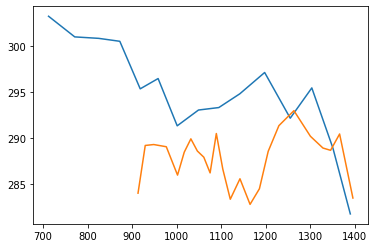

In [13]:
plt.plot(ozone_trend_mk1.loc[:14,"RCP60 EESC"],ozone_trend_mk1.loc[:14,'Global Annual Ozone (DU)'])
plt.plot(ozone_trend_mk1.loc[18:,"RCP60 EESC"],ozone_trend_mk1.loc[18:,'Global Annual Ozone (DU)'])

# is there any kind of trend there
# maybe a very slight negative one?

In [14]:
# now we're going to import pauls data and use that

paul_monthly_tco = pd.read_csv('/content/drive/MyDrive/Diss_stuff/o3colGlobe_Amon_NIWA-UKCA_197401-210012 - o3colGlobe_Amon_NIWA-UKCA_refc1+wavd_r1i1p1_197401-210012 (1).csv',skiprows=2)

paul_monthly_tco.size

1524

In [15]:
# generate the month data for this

import pandas as pd

# create a period index object 

datetime_series = pd.Series(pd.date_range("1974-01", periods=1524, freq="M"))

#datetime_series.size

paul_monthly_tco_time = pd.concat([datetime_series,paul_monthly_tco],axis=1)

paul_monthly_tco_time.columns=['time','o3colglobe']

paul_monthly_tco_time

,time,o3colglobe
0,1974-01-31,326.053644
1,1974-02-28,330.512203
2,1974-03-31,333.641127
3,1974-04-30,334.459594
4,1974-05-31,331.815736
...,...,...
1519,2100-08-31,90.167081
1520,2100-09-30,91.956203
1521,2100-10-31,90.998811
1522,2100-11-30,87.006638


In [16]:
df = paul_monthly_tco_time

#df[''] = pd.to_datetime(df.dates)
df_annual_avg = df.groupby(df.time.dt.year)['o3colglobe'].transform('mean')

df = pd.DataFrame(df_annual_avg)

#df.drop_duplicates

yearly_value = (df.groupby('o3colglobe').apply(' '.join).reset_index())

print(yearly_value)

annual_df=pd.DataFrame(yearly_value)

     o3colglobe           0
0     88.318495  o3colglobe
1     89.398963  o3colglobe
2     90.544914  o3colglobe
3     90.836723  o3colglobe
4     92.393522  o3colglobe
..          ...         ...
122  321.703616  o3colglobe
123  322.786203  o3colglobe
124  323.247870  o3colglobe
125  323.724075  o3colglobe
126  326.896063  o3colglobe

[127 rows x 2 columns]


In [17]:
df_test=annual_df.iloc[::-1]

df_test_array = np.array(df_test)

df_beans = pd.DataFrame(df_test_array)

years = np.linspace(1974,2100,127)

years_df = pd.DataFrame(years)

df_test_years = pd.concat([years_df,df_beans],axis=1)

df_test_years.columns=['year','o3colglobe','drop']

del df_test_years['drop']

annual_global_ozone = df_test_years

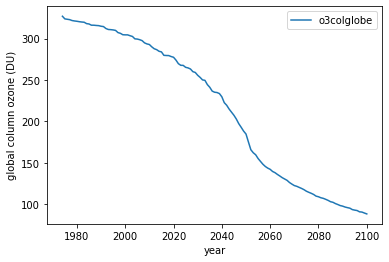

In [18]:
annual_global_ozone.plot(x='year',y='o3colglobe',ylabel='global column ozone (DU)')

# all looks good

Now we need to run the scenario from pauls paper with CFC growth of 3% a year from 1974 - we can probably just edit the data in sheets.

3% increase in CFC-11 and CFC-12 from 1974 onwards

This matches the Molina and Rowland 1974 Scenario from Velders et al. 2007 (excepot that has an upper range for estimates of 7%).

In [19]:
# first we are going to have to copy one of the emissions files from FaIR so that it can be edited for use

!cp /usr/local/lib/python3.7/dist-packages/fair/RCPs/data/RCP6_EMISSIONS.csv /content/drive/MyDrive/Diss_stuff/Relating_EESC_and_Ozone/RCP6_EMISSIONS_FOR_EDIT_2.csv



In [20]:
# now copy the modified value back into FaIR

!cp /content/drive/MyDrive/Diss_stuff/Relating_EESC_and_Ozone/RCP6_EMISSIONS_MODIFIED_MR74_NEW.csv /usr/local/lib/python3.7/dist-packages/fair/RCPs/data/RCP6_EMISSIONS_MODIFIED_MR74.csv

In [21]:
# make another copy of the lower case rcp file

!cp /usr/local/lib/python3.7/dist-packages/fair/RCPs/rcp60.py /content/drive/MyDrive/Diss_stuff/Relating_EESC_and_Ozone/rcp6_for_mod.py

In [22]:
# copy the updated lower case code back into FaIR

!cp /content/drive/MyDrive/Diss_stuff/Relating_EESC_and_Ozone/rcp6_MR74.py /usr/local/lib/python3.7/dist-packages/fair/RCPs/rcp6_MR74.py

In [23]:
# now run the calculations for EESC again

from fair.RCPs import rcp6_MR74

C60_MR, F60_MR, T60_MR = fair.forward.fair_scm(emissions=rcp6_MR74.Emissions.emissions)
concentrations_MR = C60_MR
concentrations_ods_MR = concentrations_MR[:,15:]

In [24]:
# add the years to this

years_full = np.linspace(1765,2500,736)

years_full_df = pd.DataFrame(years_full)

concentrations_ods_df_MR = pd.DataFrame(concentrations_ods_MR)

concentrations_ods_years_df_MR = pd.concat([years_full_df,concentrations_ods_df_MR], axis=1)

concentrations_ods_years_df_MR.columns = ['Year','CFC11','CFC12','CFC113','CFC114','CFC115','CCl4','Methyl chloroform','HCFC22','HCFC141b','HCFC142b','Halon 1211','Halon 1202','Halon 1301','Halon 2402','CH3Br - NATURAL','CH3Cl - NATURAL']

concentrations_ods_years_df_MR

,Year,CFC11,CFC12,CFC113,CFC114,CFC115,CCl4,Methyl chloroform,HCFC22,HCFC141b,HCFC142b,Halon 1211,Halon 1202,Halon 1301,Halon 2402,CH3Br - NATURAL,CH3Cl - NATURAL
0,1765.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,13.097500,547.996000
1,1766.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,13.097501,547.995769
2,1767.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,13.097501,547.995685
3,1768.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,13.097501,547.995653
4,1769.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,13.097501,547.995642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2496.0,1.393513e+09,2.707906e+09,12.821228,7.602300,7.091406,0.154277,6.728489e-42,0.047101,0.144333,0.040752,0.002252,1.322131e-75,0.447086,9.768285e-12,13.220441,620.621503
732,2497.0,1.435318e+09,2.789143e+09,12.821858,7.603321,7.090885,0.154288,5.508821e-42,0.047154,0.144374,0.040752,0.002252,9.365217e-76,0.447117,9.291880e-12,13.220816,620.621503
733,2498.0,1.478378e+09,2.872817e+09,12.822495,7.604337,7.090364,0.154298,4.510241e-42,0.047203,0.144411,0.040752,0.002252,6.633781e-76,0.447148,8.838710e-12,13.221191,620.621503
734,2499.0,1.522729e+09,2.959002e+09,12.823124,7.605347,7.089844,0.154308,3.692673e-42,0.047247,0.144444,0.040752,0.002252,4.698989e-76,0.447179,8.407641e-12,13.221566,620.621503


In [25]:
# set up the concentrtaions datasets

C0 = np.array(pi_concs) # this one remains constant
C_ODS = concentrations_ods_MR # this one has bto be updated

# create the dataframe containing all of the chlorine values

concentrations_ods_years_df_MR['CFC11 Cl'] = ((CFC11_cl *(C_ODS[:,0]-C0[:,0]) * CFC11_fsr/CFC11_fsr) + 45*(CFC11_br *(C_ODS[:,0]-C0[:,0]) * CFC11_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df_MR['CFC12 Cl'] = ((CFC12_cl *(C_ODS[:,1]-C0[:,1]) * CFC12_fsr/CFC11_fsr) + 45*(CFC12_br *(C_ODS[:,1]-C0[:,1]) * CFC12_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df_MR['CFC113 Cl'] = ((CFC113_cl *(C_ODS[:,2]-C0[:,2]) * CFC113_fsr/CFC11_fsr) + 45*(CFC113_br *(C_ODS[:,2]-C0[:,2]) * CFC113_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df_MR['CFC114 Cl'] = ((CFC114_cl *(C_ODS[:,3]-C0[:,3]) * CFC114_fsr/CFC11_fsr) + 45*(CFC114_br *(C_ODS[:,3]-C0[:,3]) * CFC114_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df_MR['CFC115 Cl'] = ((CFC115_cl *(C_ODS[:,4]-C0[:,4]) * CFC115_fsr/CFC11_fsr) + 45*(CFC115_br *(C_ODS[:,4]-C0[:,4]) * CFC115_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df_MR['CCl4 Cl'] = ((CCL4_cl *(C_ODS[:,5]-C0[:,5]) * CARB_TET_fsr/CFC11_fsr) + 45*(CCL4_br *(C_ODS[:,5]-C0[:,5]) * CARB_TET_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df_MR['Methyl chloroform Cl'] = ((MCF_cl *(C_ODS[:,6]-C0[:,6]) * MCF_fsr/CFC11_fsr) + 45*(MCF_br *(C_ODS[:,6]-C0[:,6]) * MCF_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df_MR['HCFC22 Cl'] = ((HCFC22_cl *(C_ODS[:,7]-C0[:,7]) * HCFC22_fsr/CFC11_fsr) + 45*(HCFC22_br *(C_ODS[:,7]-C0[:,7]) * HCFC22_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df_MR['HCFC141b Cl'] = ((HCFC141B_cl *(C_ODS[:,8]-C0[:,8]) * HCFC141B_fsr/CFC11_fsr) + 45*(HCFC141B_br *(C_ODS[:,8]-C0[:,8]) * HCFC141B_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df_MR['HCFC142b Cl'] = ((HCFC142B_cl *(C_ODS[:,9]-C0[:,9]) * HCFC142B_fsr/CFC11_fsr) + 45*(HCFC142B_br *(C_ODS[:,9]-C0[:,9]) * HCFC142B_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df_MR['Halon 1211 Cl'] = ((HALON1211_cl *(C_ODS[:,10]-C0[:,10]) * HALON1211_fsr/CFC11_fsr) + 45*(HALON1211_br *(C_ODS[:,10]-C0[:,10]) * HALON1211_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df_MR['Halon 1202 Cl'] = ((HALON1202_cl *(C_ODS[:,11]-C0[:,11]) * HALON1202_fsr/CFC11_fsr) + 45*(HALON1202_br *(C_ODS[:,11]-C0[:,11]) * HALON1202_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df_MR['Halon 1301 Cl'] = ((HALON1301_cl *(C_ODS[:,12]-C0[:,12]) * HALON1301_fsr/CFC11_fsr) + 45*(HALON1301_br *(C_ODS[:,12]-C0[:,12]) * HALON1301_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df_MR['Halon 2402 Cl'] = ((HALON2402_cl *(C_ODS[:,13]-C0[:,13]) * HALON2402_fsr/CFC11_fsr) + 45*(HALON2402_br *(C_ODS[:,13]-C0[:,13]) * HALON2402_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df_MR['CH3Br Cl - NATURAL'] = ((CH3BR_cl *(C_ODS[:,14]-C0[:,14]) * CH3BR_fsr/CFC11_fsr) + 45*(CH3BR_br *(C_ODS[:,14]-C0[:,14]) * CH3BR_fsr/CFC11_fsr)) * CFC11_fsr
concentrations_ods_years_df_MR['CH3Cl Cl - NATURAL'] = ((CH3CL_cl *(C_ODS[:,15]-C0[:,15]) * CH3CL_fsr/CFC11_fsr) + 45*(CH3CL_br *(C_ODS[:,15]-C0[:,15]) * CH3CL_fsr/CFC11_fsr)) * CFC11_fsr

# sum these up to calculate the EESC
# specify the columns that need to be summed for each

total_cols = ['CFC11 Cl','CFC12 Cl','CFC113 Cl','CFC114 Cl','CFC115 Cl','CCl4 Cl','Methyl chloroform Cl','HCFC22 Cl','HCFC141b Cl','HCFC142b Cl','Halon 1211 Cl','Halon 1202 Cl','Halon 1301 Cl','Halon 2402 Cl','CH3Br Cl - NATURAL','CH3Cl Cl - NATURAL']
natural_cols = ['CH3Br Cl - NATURAL','CH3Cl Cl - NATURAL']

concentrations_ods_years_df_MR['Total EESC'] = concentrations_ods_years_df_MR[total_cols].sum(axis=1)
concentrations_ods_years_df_MR['Natural EESC'] = concentrations_ods_years_df_MR[natural_cols].sum(axis=1)
concentrations_ods_years_df_MR['Anthropogenic EESC'] = concentrations_ods_years_df_MR['Total EESC'] - concentrations_ods_years_df_MR['Natural EESC']

concentrations_ods_years_df_MR.loc[209:335]

,Year,CFC11,CFC12,CFC113,CFC114,CFC115,CCl4,Methyl chloroform,HCFC22,HCFC141b,...,HCFC142b Cl,Halon 1211 Cl,Halon 1202 Cl,Halon 1301 Cl,Halon 2402 Cl,CH3Br Cl - NATURAL,CH3Cl Cl - NATURAL,Total EESC,Natural EESC,Anthropogenic EESC
209,1974.0,93.451420,179.697943,9.124962,7.300697,0.505270,80.285780,3.760583e+01,21.776937,0.000000,...,0.019035,2.925431,2.563468e-01,0.395155,2.051140,44.691426,29.783674,562.519722,74.475100,488.044623
210,1975.0,105.815194,199.443727,10.385127,7.642343,0.620040,81.914610,4.378218e+01,24.361279,0.000000,...,0.023810,3.940592,3.128577e-01,0.602976,2.593822,47.479655,30.145946,611.595090,77.625601,533.969489
211,1976.0,118.339774,219.639053,11.830122,7.997213,0.753359,83.481982,5.046310e+01,27.258182,0.000000,...,0.028316,5.225553,3.753913e-01,0.905719,3.207207,50.353753,30.450969,662.655669,80.804723,581.850946
212,1977.0,131.034602,240.298826,13.485966,8.365833,0.908298,84.990216,5.917069e+01,30.420760,0.000000,...,0.032567,6.758614,4.436913e-01,1.318882,3.887846,53.317432,30.707131,718.805201,84.024562,634.780638
213,1978.0,143.909303,261.438388,15.383537,8.748493,1.088540,86.441541,7.063496e+01,33.768883,0.000000,...,0.036578,8.533016,5.183263e-01,1.837915,4.632460,56.373357,30.921472,781.549032,87.294829,694.254203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2096.0,10202.369665,19743.149246,25.171180,9.145261,7.733687,3.091186,3.728002e-07,5.380373,2.197507,...,0.138959,1.918543,5.896522e-14,14.789455,0.277245,-3.017628,31.955323,23546.772926,28.937695,23517.835232
332,2097.0,10509.076156,20339.681707,24.876783,9.097254,7.726109,2.974552,3.052230e-07,4.952752,2.089365,...,0.131502,1.811548,4.176757e-14,14.572259,0.263724,-3.017628,31.955323,24252.630502,28.937695,24223.692807
333,2098.0,10824.969877,20954.067974,24.585830,9.049500,7.718538,2.862318,2.498954e-07,4.558814,1.986451,...,0.124432,1.710548,2.958574e-14,14.358140,0.250862,-3.017628,31.955323,24979.685792,28.937695,24950.748097
334,2099.0,11150.326753,21586.844079,24.298280,9.001996,7.710974,2.754319,2.045971e-07,4.195942,1.888541,...,0.117734,1.615182,2.095684e-14,14.146812,0.238627,-3.017628,31.955323,25728.572825,28.937695,25699.635130


In [26]:
concentrations_ods_years_df['Total EESC']

0      7.662400e-05
1     -4.224885e-08
2     -3.026398e-05
3     -4.196004e-05
4     -4.642841e-05
           ...     
731    1.293671e+02
732    1.293828e+02
733    1.293985e+02
734    1.294142e+02
735    1.294267e+02
Name: Total EESC, Length: 736, dtype: float64

In [27]:
# now we just need to add the data from the MR EESC back into the dataframe with pauls ozone data

df_ph = pd.DataFrame(concentrations_ods_years_df_MR.loc[209:335,'Total EESC'])

df_ph_array = np.array(df_ph)

df_ph_index = pd.DataFrame(df_ph_array)

df_ph_index.columns=['Total EESC']

annual_global_ozone['Total EESC'] = df_ph_index['Total EESC']

annual_global_ozone

,year,o3colglobe,Total EESC
0,1974.0,326.896063,562.519722
1,1975.0,323.724075,611.595090
2,1976.0,323.24787,662.655669
3,1977.0,322.786203,718.805201
4,1978.0,321.703616,781.549032
...,...,...,...
122,2096.0,92.393522,23546.772926
123,2097.0,90.836723,24252.630502
124,2098.0,90.544914,24979.685792
125,2099.0,89.398963,25728.572825


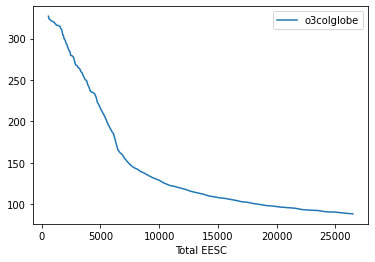

In [28]:
# right now plot EESC against ozone

annual_global_ozone.plot(x='Total EESC',y='o3colglobe')

In [29]:
annual_global_ozone

,year,o3colglobe,Total EESC
0,1974.0,326.896063,562.519722
1,1975.0,323.724075,611.595090
2,1976.0,323.24787,662.655669
3,1977.0,322.786203,718.805201
4,1978.0,321.703616,781.549032
...,...,...,...
122,2096.0,92.393522,23546.772926
123,2097.0,90.836723,24252.630502
124,2098.0,90.544914,24979.685792
125,2099.0,89.398963,25728.572825


In [30]:
annual_global_ozone.to_csv(r'/content/drive/MyDrive/Diss_stuff/annual_global_ozone.csv')

Now we need to perform a cubic polyfit on this to get the fitting relationship.

In [31]:
# convert the df to numeris form
numeric = annual_global_ozone.apply(pd.to_numeric)

numeric

# define x and y values

x = numeric['Total EESC'] # EESC from array
y = numeric['o3colglobe']

degree_linear = 1 # for linear polynomial
degree_quadratic = 2 # for quadratic polynomial
degree_cubic = 3 # we want a cubiuc fit for our polyfit, so the degree for this is 3

# calculating value of coefficients in case of linear polynomial
z = np.polyfit(x, y, degree_linear)
print("\ncoefficient value in case of linear polynomial:\n", z)

# calculating value of coefficient in case of quadratic polynomial
z1 = np.polyfit(x, y, degree_quadratic)
print("\ncoefficient value in case of quadratic polynomial:\n", z1)

# calculating value of coefficient in case of cubic polynomial
z2 = np.polyfit(x, y, degree_cubic)
print("\ncoefficient value in case of cubic polynomial:\n", z2)



coefficient value in case of linear polynomial:
 [-1.12366739e-02  2.96087488e+02]

coefficient value in case of quadratic polynomial:
 [ 7.75778618e-07 -2.87659901e-02  3.46108181e+02]

coefficient value in case of cubic polynomial:
 [-3.45642595e-11  2.04377593e-06 -4.04933991e-02  3.66748613e+02]


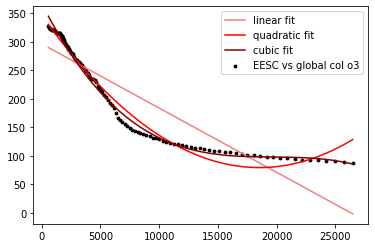

In [32]:
# now generate a new set of values to fit the plot using the EESC values from the dataframe

numeric_lin_fit = (-1.12366739e-02*numeric['Total EESC']) + 2.96087488e+02
numeric_quad_fit = (7.75778618e-07*numeric['Total EESC']**2) + (-2.87659901e-02*numeric['Total EESC']) + 3.46108181e+02
numeric_cubic_fit = (-3.45642595e-11*numeric['Total EESC']**3) + (2.04377593e-06*numeric['Total EESC']**2) + (-4.04933991e-02*numeric['Total EESC']) + (3.66748613e+02)



plt.scatter(numeric['Total EESC'],numeric['o3colglobe'],color='black',label='EESC vs global col o3',s=8)
plt.plot(numeric['Total EESC'],numeric_lin_fit,color='lightcoral',label='linear fit')
plt.plot(numeric['Total EESC'],numeric_quad_fit,color='red',label='quadratic fit')
plt.plot(numeric['Total EESC'],numeric_cubic_fit,color='maroon',label='cubic fit')
plt.xlabel='total EESC MR74'
plt.ylabel='global annual column ozone (DU)'
plt.legend()

# now print out the


# is there any good method for measuring the statistical goodness of fit for a cubic polynomial?

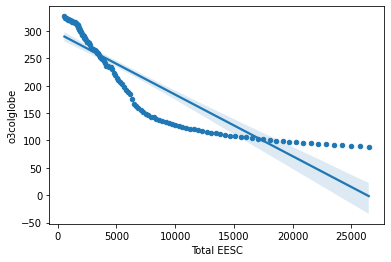

In [33]:
# use seaborn to find the fit and the confidence intervals

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



sns.regplot(x=numeric['Total EESC'], y=numeric['o3colglobe'], data = numeric, order=1, ci=95, scatter_kws={"s": 20},x_estimator=np.mean);

seaborn plot above shows a scatterplot of total EESC vs. global annual column ozone and then plots the resulting first order regression line with a 95% confidence interval for that regression.

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

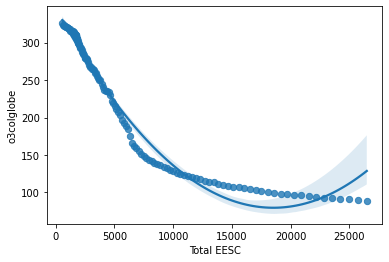

In [34]:
# now repeat this, but for a second order fit

ax = sns.regplot(x=numeric['Total EESC'], y=numeric['o3colglobe'], data = numeric, ci=99, order=2, scatter_kws={"s": 40});
ax.get_children()

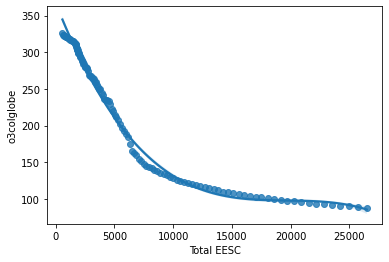

In [35]:
# now try to extract the values

import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

# numbers for plotting
x = numeric['Total EESC']
y = numeric['o3colglobe']
# Manual binning to retain control

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h
print()

c, c1, c2 = mean_confidence_interval(y)
sns.regplot(x=x, y=y, ci=95,order=3)
plt.show()

In [36]:
data = [x,y]

mean_confidence_interval(data)


(3682.167523213453,
 array([ 2.18522629e+03,  1.85329350e+03,  1.52587504e+03,  1.16621829e+03,
         7.60722522e+02,  3.70309439e+02,  6.62593808e+00, -3.48709110e+02,
        -6.85369285e+02, -1.04054160e+03, -1.42852829e+03, -1.79868984e+03,
        -2.17239323e+03, -2.58190397e+03, -3.02625313e+03, -3.44028719e+03,
        -3.86668593e+03, -4.27122886e+03, -4.61369500e+03, -4.88910859e+03,
        -5.08608176e+03, -5.18951747e+03, -5.25649664e+03, -5.41045963e+03,
        -5.58522176e+03, -5.70324148e+03, -5.76124403e+03, -5.85000530e+03,
        -6.02005500e+03, -6.22284048e+03, -6.43932443e+03, -6.64730702e+03,
        -6.88063301e+03, -7.15642751e+03, -7.46547425e+03, -7.77867869e+03,
        -8.09704992e+03, -8.43683456e+03, -8.78251053e+03, -9.12985890e+03,
        -9.49223694e+03, -9.79376403e+03, -1.01092718e+04, -1.04697243e+04,
        -1.08598003e+04, -1.12757870e+04, -1.17060281e+04, -1.21676724e+04,
        -1.26506812e+04, -1.31345636e+04, -1.36225888e+04, -1.414125

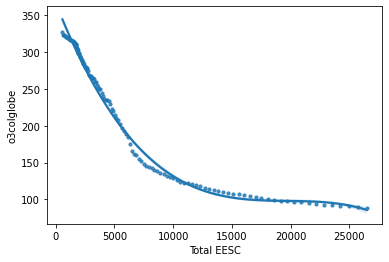

In [37]:
# again, but for a third order fit

sns.regplot(x=numeric['Total EESC'], y=numeric['o3colglobe'], data = numeric, ci=95, order=3, scatter_kws={"s": 10});

In [38]:
# using sklearn to calculate the coefficient of determination - the R^2 score

from sklearn.metrics import r2_score

# assume that y is the actual value and f is the predicted value

y = numeric['o3colglobe']
f_lin = numeric_lin_fit
f_quad = numeric_quad_fit
f_cub = numeric_cubic_fit

r2_lin = r2_score(y,f_lin)
r2_quad = r2_score(y,f_quad)
r2_cub = r2_score(y,f_cub)

print('the r2 score for the linear regression model is',r2_lin)
print('the r2 score for the quadratic polyfit is',r2_quad)
print('the r2 score for the cubic polyfit is',r2_cub)

the r2 score for the linear regression model is 0.8102552886622365
the r2 score for the quadratic polyfit is 0.978437460092062
the r2 score for the cubic polyfit is 0.9929626093365875


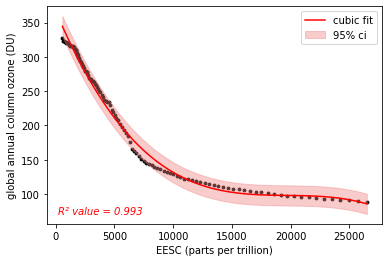

In [39]:
# how can we calculate the standard error for this fit?

import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

#numeric_cubic_fit

# calculate the R2 for the cubic fit

from scipy.stats import sem

data = np.array(numeric_cubic_fit)

sem = sem(data)

# create new dataframe with upper and lower bounds of standard error values

df_sem = pd.DataFrame(numeric['year'])

df_sem['o3colglobe'] = numeric['o3colglobe']
df_sem['numeric cubic fit mid'] = data
df_sem['numeric cubic fit lower'] = data - (1.96*sem)
df_sem['numeric cubic fit upper'] = data + (1.96*sem)
df_sem['numeric cubic fit lower 99'] = data - (2.576*sem)
df_sem['numeric cubic fit upper 99'] =  data + (2.576*sem)

#df_sem

plt.scatter(numeric['Total EESC'],df_sem['o3colglobe'],color='black',s=8)
plt.plot(numeric['Total EESC'],df_sem['numeric cubic fit mid'],color='red',label='cubic fit')
plt.fill_between(numeric['Total EESC'],df_sem['numeric cubic fit lower'],df_sem['numeric cubic fit upper'],color='lightcoral', alpha=0.4, label ='95% ci')
plt.xlabel('EESC (parts per trillion)')
plt.ylabel('global annual column ozone (DU)')
plt.text(200,70,'R\u00b2 value = {:.4}'.format(r2_cub),fontstyle='italic',color='red')
plt.legend()

In [40]:
y_lower = df_sem['numeric cubic fit lower']
y_upper = df_sem['numeric cubic fit upper']
y_lower_99 = df_sem['numeric cubic fit lower 99']
y_upper_99 = df_sem['numeric cubic fit upper 99']

# calculate the values for the upper and lower polyfit cubit fits

z2_lower = np.polyfit(x,y_lower,degree_cubic)
print("\ncoefficient value in case of cubic polynomial lower fit:\n", z2_lower)

z2_upper = np.polyfit(x,y_upper,degree_cubic)
print("\ncoefficient value in case of cubic polynomial lower fit:\n", z2_upper)

z2_lower_99 = np.polyfit(x,y_lower_99,degree_cubic)
print("\ncoefficient value in case of cubic polynomial lower fit:\n", z2_lower_99)

z2_upper_99 = np.polyfit(x,y_upper_99,degree_cubic)
print("\ncoefficient value in case of cubic polynomial lower fit:\n", z2_upper_99)



coefficient value in case of cubic polynomial lower fit:
 [-3.45642595e-11  2.04377593e-06 -4.04933991e-02  3.52025676e+02]

coefficient value in case of cubic polynomial lower fit:
 [-3.45642595e-11  2.04377593e-06 -4.04933991e-02  3.81471550e+02]

coefficient value in case of cubic polynomial lower fit:
 [-3.45642595e-11  2.04377593e-06 -4.04933991e-02  3.47398467e+02]

coefficient value in case of cubic polynomial lower fit:
 [-3.45642595e-11  2.04377593e-06 -4.04933991e-02  3.86098759e+02]


In [41]:
# construct a dataframe for the polyfits and calculate the residuals

df_o3 = pd.DataFrame(y)
df_o3['year'] = np.linspace(1974,2100,127)
df_o3['linear fit'] = f_lin
df_o3['quadratic fit'] = f_quad
df_o3['cubic fit'] = f_cub
df_o3['lin resid.'] = df_o3['o3colglobe'] -  df_o3['linear fit']
df_o3['quad resid.'] = df_o3['o3colglobe'] -  df_o3['quadratic fit']
df_o3['cubic resid.'] = df_o3['o3colglobe'] -  df_o3['cubic fit']

df_o3

#df_residuals.columns = ['o3colglobe','linear fit','quadratic fit','cubic fit']

,o3colglobe,year,linear fit,quadratic fit,cubic fit,lin resid.,quad resid.,cubic resid.
0,326.896063,1974.0,289.766637,330.172223,344.610834,37.129426,-3.276160,-17.714771
1,323.724075,1975.0,289.215193,328.805222,342.739613,34.508882,-5.081146,-19.015538
2,323.247870,1976.0,288.641442,327.386889,340.802823,34.606428,-4.139019,-17.554953
3,322.786203,1977.0,288.010508,325.831868,338.684890,34.775695,-3.045665,-15.898687
4,321.703616,1978.0,287.305476,324.100010,336.332913,34.398140,-2.396394,-14.629297
...,...,...,...,...,...,...,...,...
122,92.393522,2096.0,31.500079,98.892799,95.177962,60.893443,-6.499277,-2.784441
123,90.836723,2097.0,23.568588,104.762544,93.741325,67.268135,-13.925822,-2.904602
124,90.544914,2098.0,15.398905,111.616777,91.770041,75.146010,-21.071862,-1.225126
125,89.398963,2099.0,6.983905,119.534305,89.134745,82.415058,-30.135342,0.264218


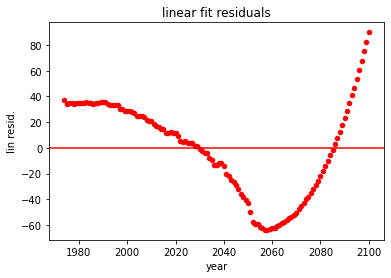

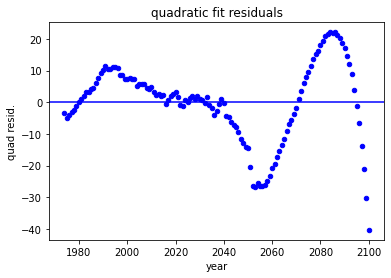

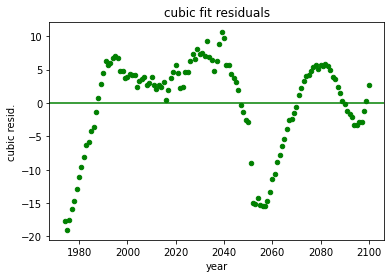

In [42]:
# now plot the residuals



ax1 = df_o3.plot(x='year',y='lin resid.',title='linear fit residuals',kind='scatter',color='red')
ax1.axhline(0,c='r')

ax2 = df_o3.plot(x='year',y='quad resid.',title='quadratic fit residuals',kind='scatter',color='blue')
ax2.axhline(0,c='b')

ax3 = df_o3.plot(x='year',y='cubic resid.',title='cubic fit residuals',kind='scatter',color='green')
ax3.axhline(0,c='g')

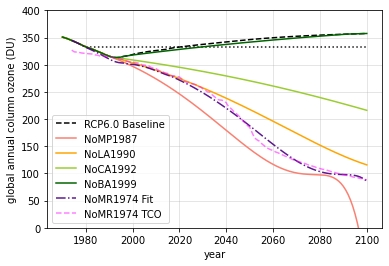

<Figure size 1008x1152 with 0 Axes>

In [43]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)


eesc_scenario_2100 = pd.read_csv('/content/drive/MyDrive/Diss_stuff/scenario_2100_eesc.csv')

eesc_scenario_2100['EESC RCP60 baseline fit'] = (-3.45642595e-11*eesc_scenario_2100['eesc RCP60 baseline']**3) + (2.04377593e-06*eesc_scenario_2100['eesc RCP60 baseline']**2) + (-4.04933991e-02*eesc_scenario_2100['eesc RCP60 baseline']) + (3.66748613e+02)
eesc_scenario_2100['EESC NoMP1987 fit'] = (-3.45642595e-11*eesc_scenario_2100['EESC NoMP1987']**3) + (2.04377593e-06*eesc_scenario_2100['EESC NoMP1987']**2) + (-4.04933991e-02*eesc_scenario_2100['EESC NoMP1987']) + (3.66748613e+02)
eesc_scenario_2100['EESC NoLA1990 fit'] = (-3.45642595e-11*eesc_scenario_2100['EESC NoLA1990']**3) + (2.04377593e-06*eesc_scenario_2100['EESC NoLA1990']**2) + (-4.04933991e-02*eesc_scenario_2100['EESC NoLA1990']) + (3.66748613e+02)
eesc_scenario_2100['EESC NoCA1992 fit'] = (-3.45642595e-11*eesc_scenario_2100['EESC NoCA1992']**3) + (2.04377593e-06*eesc_scenario_2100['EESC NoCA1992']**2) + (-4.04933991e-02*eesc_scenario_2100['EESC NoCA1992']) + (3.66748613e+02)
eesc_scenario_2100['EESC NoBA1999 fit'] = (-3.45642595e-11*eesc_scenario_2100['EESC NoBA1999']**3) + (2.04377593e-06*eesc_scenario_2100['EESC NoBA1999']**2) + (-4.04933991e-02*eesc_scenario_2100['EESC NoBA1999']) + (3.66748613e+02)

# now we just have to add the MR74 dataset and then plot the fits

df=eesc_scenario_2100

plt.plot(df.loc[205:,'time'],df.loc[205:,'EESC RCP60 baseline fit'],label='RCP6.0 Baseline',color='black',linestyle='dashed')
plt.plot(df.loc[205:,'time'],df.loc[205:,'EESC NoMP1987 fit'],label='NoMP1987',color='salmon')
plt.plot(df.loc[205:,'time'],df.loc[205:,'EESC NoLA1990 fit'],label='NoLA1990',color='orange')
plt.plot(df.loc[205:,'time'],df.loc[205:,'EESC NoCA1992 fit'],label='NoCA1992',color='yellowgreen')
plt.plot(df.loc[205:,'time'],df.loc[205:,'EESC NoBA1999 fit'],label='NoBA1999',color='darkgreen')
plt.plot(annual_global_ozone['year'],numeric_cubic_fit,label='NoMR1974 Fit',linestyle='dashdot',color='indigo',alpha = 0.9)
plt.plot(annual_global_ozone['year'],annual_global_ozone['o3colglobe'],label='NoMR1974 TCO',linestyle='dashed',color='fuchsia',alpha = 0.5)
plt.xlabel('year')
plt.ylabel('global annual column ozone (DU)')
plt.tick_params(axis='both',which='major')
plt.ylim([0,400])
plt.hlines(y=df.loc[215,'EESC RCP60 baseline fit'],xmin=1980,xmax=2100,colors='black',linestyle='dotted',alpha=0.90)
plt.grid(alpha=0.4)
plt.legend()
plt.figure(figsize=(14,16))
plt.show()

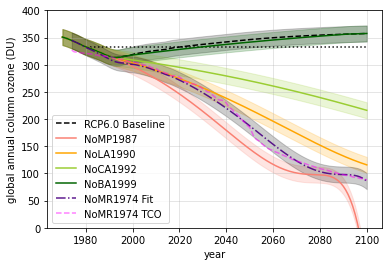

<Figure size 1008x1152 with 0 Axes>

In [44]:
# same plot but using the upper and lower fits

import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)


eesc_scenario_2100 = pd.read_csv('/content/drive/MyDrive/Diss_stuff/scenario_2100_eesc.csv')

eesc_scenario_2100['EESC RCP60 baseline fit'] = (-3.45642595e-11*eesc_scenario_2100['eesc RCP60 baseline']**3) + (2.04377593e-06*eesc_scenario_2100['eesc RCP60 baseline']**2) + (-4.04933991e-02*eesc_scenario_2100['eesc RCP60 baseline']) + (3.66748613e+02)
eesc_scenario_2100['EESC NoMP1987 fit'] = (-3.45642595e-11*eesc_scenario_2100['EESC NoMP1987']**3) + (2.04377593e-06*eesc_scenario_2100['EESC NoMP1987']**2) + (-4.04933991e-02*eesc_scenario_2100['EESC NoMP1987']) + (3.66748613e+02)
eesc_scenario_2100['EESC NoLA1990 fit'] = (-3.45642595e-11*eesc_scenario_2100['EESC NoLA1990']**3) + (2.04377593e-06*eesc_scenario_2100['EESC NoLA1990']**2) + (-4.04933991e-02*eesc_scenario_2100['EESC NoLA1990']) + (3.66748613e+02)
eesc_scenario_2100['EESC NoCA1992 fit'] = (-3.45642595e-11*eesc_scenario_2100['EESC NoCA1992']**3) + (2.04377593e-06*eesc_scenario_2100['EESC NoCA1992']**2) + (-4.04933991e-02*eesc_scenario_2100['EESC NoCA1992']) + (3.66748613e+02)
eesc_scenario_2100['EESC NoBA1999 fit'] = (-3.45642595e-11*eesc_scenario_2100['EESC NoBA1999']**3) + (2.04377593e-06*eesc_scenario_2100['EESC NoBA1999']**2) + (-4.04933991e-02*eesc_scenario_2100['EESC NoBA1999']) + (3.66748613e+02)

eesc_scenario_2100['EESC RCP60 baseline lower fit'] = (-3.45642595e-11*eesc_scenario_2100['eesc RCP60 baseline']**3) + (2.04377593e-06*eesc_scenario_2100['eesc RCP60 baseline']**2) + (-4.04933991e-02*eesc_scenario_2100['eesc RCP60 baseline']) + (3.52025676e+02)
eesc_scenario_2100['EESC NoMP1987 lower fit'] = (-3.45642595e-11*eesc_scenario_2100['EESC NoMP1987']**3) + (2.04377593e-06*eesc_scenario_2100['EESC NoMP1987']**2) + (-4.04933991e-02*eesc_scenario_2100['EESC NoMP1987']) + (3.52025676e+02)
eesc_scenario_2100['EESC NoLA1990 lower fit'] = (-3.45642595e-11*eesc_scenario_2100['EESC NoLA1990']**3) + (2.04377593e-06*eesc_scenario_2100['EESC NoLA1990']**2) + (-4.04933991e-02*eesc_scenario_2100['EESC NoLA1990']) + (3.52025676e+02)
eesc_scenario_2100['EESC NoCA1992 lower fit'] = (-3.45642595e-11*eesc_scenario_2100['EESC NoCA1992']**3) + (2.04377593e-06*eesc_scenario_2100['EESC NoCA1992']**2) + (-4.04933991e-02*eesc_scenario_2100['EESC NoCA1992']) + (3.52025676e+02)
eesc_scenario_2100['EESC NoBA1999 lower fit'] = (-3.45642595e-11*eesc_scenario_2100['EESC NoBA1999']**3) + (2.04377593e-06*eesc_scenario_2100['EESC NoBA1999']**2) + (-4.04933991e-02*eesc_scenario_2100['EESC NoBA1999']) + (3.52025676e+02)

eesc_scenario_2100['EESC RCP60 baseline upper fit'] = (-3.45642595e-11*eesc_scenario_2100['eesc RCP60 baseline']**3) + (2.04377593e-06*eesc_scenario_2100['eesc RCP60 baseline']**2) + (-4.04933991e-02*eesc_scenario_2100['eesc RCP60 baseline']) + (3.81471550e+02)
eesc_scenario_2100['EESC NoMP1987 upper fit'] = (-3.45642595e-11*eesc_scenario_2100['EESC NoMP1987']**3) + (2.04377593e-06*eesc_scenario_2100['EESC NoMP1987']**2) + (-4.04933991e-02*eesc_scenario_2100['EESC NoMP1987']) + (3.81471550e+02)
eesc_scenario_2100['EESC NoLA1990 upper fit'] = (-3.45642595e-11*eesc_scenario_2100['EESC NoLA1990']**3) + (2.04377593e-06*eesc_scenario_2100['EESC NoLA1990']**2) + (-4.04933991e-02*eesc_scenario_2100['EESC NoLA1990']) + (3.81471550e+02)
eesc_scenario_2100['EESC NoCA1992 upper fit'] = (-3.45642595e-11*eesc_scenario_2100['EESC NoCA1992']**3) + (2.04377593e-06*eesc_scenario_2100['EESC NoCA1992']**2) + (-4.04933991e-02*eesc_scenario_2100['EESC NoCA1992']) + (3.81471550e+02)
eesc_scenario_2100['EESC NoBA1999 upper fit'] = (-3.45642595e-11*eesc_scenario_2100['EESC NoBA1999']**3) + (2.04377593e-06*eesc_scenario_2100['EESC NoBA1999']**2) + (-4.04933991e-02*eesc_scenario_2100['EESC NoBA1999']) + (3.81471550e+02)

# now we just have to add the MR74 dataset and then plot the fits

df=eesc_scenario_2100

df

plt.plot(df.loc[205:,'time'],df.loc[205:,'EESC RCP60 baseline fit'],label='RCP6.0 Baseline',color='black',linestyle='dashed')
plt.fill_between(df.loc[205:,'time'],df.loc[205:,'EESC RCP60 baseline lower fit'],df.loc[205:,'EESC RCP60 baseline upper fit'],color='black', alpha=0.2)

plt.plot(df.loc[205:,'time'],df.loc[205:,'EESC NoMP1987 fit'],label='NoMP1987',color='salmon')
plt.fill_between(df.loc[205:,'time'],df.loc[205:,'EESC NoMP1987 lower fit'],df.loc[205:,'EESC NoMP1987 upper fit'],color='salmon', alpha=0.2)

plt.plot(df.loc[205:,'time'],df.loc[205:,'EESC NoLA1990 fit'],label='NoLA1990',color='orange')
plt.fill_between(df.loc[205:,'time'],df.loc[205:,'EESC NoLA1990 lower fit'],df.loc[205:,'EESC NoLA1990 upper fit'],color='orange', alpha=0.2)

plt.plot(df.loc[205:,'time'],df.loc[205:,'EESC NoCA1992 fit'],label='NoCA1992',color='yellowgreen')
plt.fill_between(df.loc[205:,'time'],df.loc[205:,'EESC NoCA1992 lower fit'],df.loc[205:,'EESC NoCA1992 upper fit'],color='yellowgreen', alpha=0.2)

plt.plot(df.loc[205:,'time'],df.loc[205:,'EESC NoBA1999 fit'],label='NoBA1999',color='darkgreen')
plt.fill_between(df.loc[205:,'time'],df.loc[205:,'EESC NoBA1999 lower fit'],df.loc[205:,'EESC NoBA1999 upper fit'],color='darkgreen', alpha=0.2)

plt.plot(annual_global_ozone['year'],numeric_cubic_fit,label='NoMR1974 Fit',linestyle='dashdot',color='indigo',alpha = 0.9)
plt.fill_between(df_sem['year'],df_sem['numeric cubic fit lower'],df_sem['numeric cubic fit upper'],color='black', alpha=0.2)

plt.plot(annual_global_ozone['year'],annual_global_ozone['o3colglobe'],label='NoMR1974 TCO',linestyle='dashed',color='fuchsia',alpha = 0.5)

plt.xlabel('year')
plt.ylabel('global annual column ozone (DU)')
plt.tick_params(axis='both',which='major')
plt.ylim([0,400])
plt.hlines(y=df.loc[215,'EESC RCP60 baseline fit'],xmin=1980,xmax=2100,colors='black',linestyle='dotted',alpha=0.90)
plt.grid(alpha=0.4)
plt.legend()
plt.figure(figsize=(14,16))
plt.show()


The plot above accounts for the 95% confidence interval for the cubic polyfit of EESC to TCO data. This means that, if the cubic relationship is to be trusted, there is 95% chance that the true values will be within the range.

From paul about extreme negative values for NoMP1987 scenario:

"Negative values: Well, that can’t be the case! I guess you get an extreme EESC value with your NoMP (etc) scenarios, or at least way higher than the EESCs from my WorldAvd scenarios? Not necessarily an issue, but worth commenting on that comparison in your discussion."

Definitely worth talking about in the discussion and exploring why this extreme tipping point is reached. Plus its worth comparing to the MR74 scenario to try to identify why NoMP is worse when divergence starts earlier for the MR74 scenario.

Now we want to try to find the conifdence interval for the cubic fit.

As the sample size in this case is >30 (with 127 values), it makes sense to assume the samples are normally distributed due to the central limit theorem.

<Figure size 1008x1296 with 0 Axes>

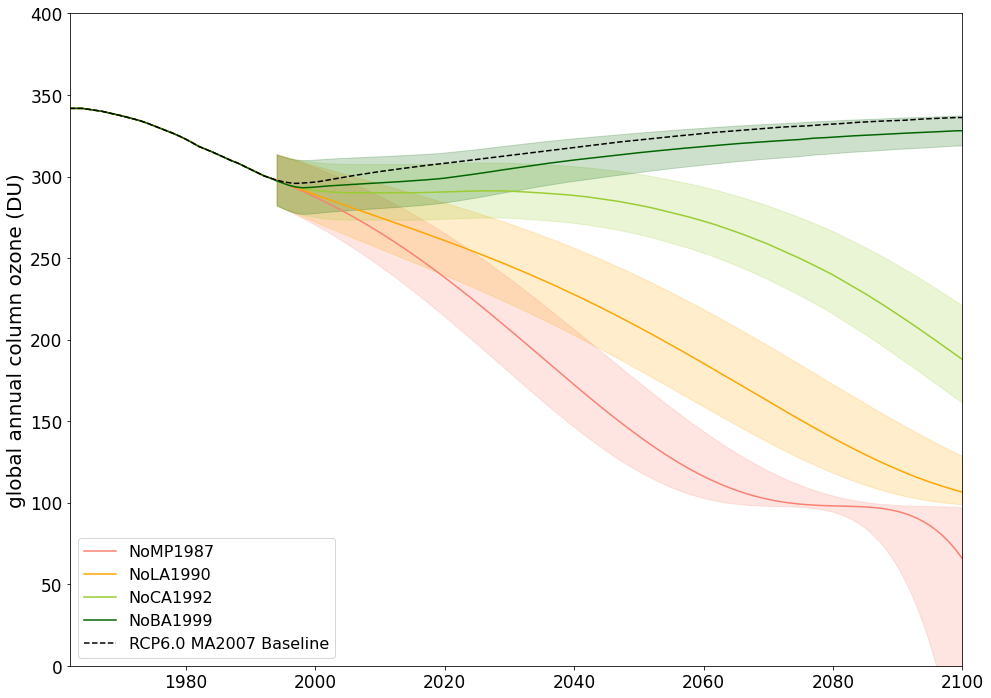

<Figure size 1008x1296 with 0 Axes>

In [45]:
# now do the same, but with the updated datasets for EESC

final_eesc = pd.read_csv('/content/drive/MyDrive/Diss_stuff/Final_EESC.csv')

plt.figure(figsize=[16,12])
plt.tick_params(axis='both', which='major', labelsize=17)

#final_eesc

# mid ones

final_eesc['EESC MA2007 baseline fit'] = (-3.45642595e-11*final_eesc['MA2007 baseline']**3) + (2.04377593e-06*final_eesc['MA2007 baseline']**2) + (-4.04933991e-02*final_eesc['MA2007 baseline']) + (3.66748613e+02)
final_eesc['EESC NoMP1987 fit'] = (-3.45642595e-11*final_eesc['MP']**3) + (2.04377593e-06*final_eesc['MP']**2) + (-4.04933991e-02*final_eesc['MP']) + (3.66748613e+02)
final_eesc['EESC NoLA1990 fit'] = (-3.45642595e-11*final_eesc['LA']**3) + (2.04377593e-06*final_eesc['LA']**2) + (-4.04933991e-02*final_eesc['LA']) + (3.66748613e+02)
final_eesc['EESC NoCA1992 fit'] = (-3.45642595e-11*final_eesc['CA']**3) + (2.04377593e-06*final_eesc['CA']**2) + (-4.04933991e-02*final_eesc['CA']) + (3.66748613e+02)
final_eesc['EESC NoBA1999 fit'] = (-3.45642595e-11*final_eesc['BA']**3) + (2.04377593e-06*final_eesc['BA']**2) + (-4.04933991e-02*final_eesc['BA']) + (3.66748613e+02)

# lower ones

final_eesc['EESC NoMP1987 lower fit'] = (-3.45642595e-11*final_eesc['MP lower']**3) + (2.04377593e-06*final_eesc['MP lower']**2) + (-4.04933991e-02*final_eesc['MP lower']) + (3.66748613e+02)
final_eesc['EESC NoLA1990 lower fit'] = (-3.45642595e-11*final_eesc['LA lower']**3) + (2.04377593e-06*final_eesc['LA lower']**2) + (-4.04933991e-02*final_eesc['LA lower']) + (3.66748613e+02)
final_eesc['EESC NoCA1992 lower fit'] = (-3.45642595e-11*final_eesc['CA lower']**3) + (2.04377593e-06*final_eesc['CA lower']**2) + (-4.04933991e-02*final_eesc['CA lower']) + (3.66748613e+02)
final_eesc['EESC NoBA1999 lower fit'] = (-3.45642595e-11*final_eesc['BA lower']**3) + (2.04377593e-06*final_eesc['BA lower']**2) + (-4.04933991e-02*final_eesc['BA lower']) + (3.66748613e+02)

# upper ones

final_eesc['EESC NoMP1987 upper fit'] = (-3.45642595e-11*final_eesc['MP upper']**3) + (2.04377593e-06*final_eesc['MP upper']**2) + (-4.04933991e-02*final_eesc['MP upper']) + (3.66748613e+02)
final_eesc['EESC NoLA1990 upper fit'] = (-3.45642595e-11*final_eesc['LA upper']**3) + (2.04377593e-06*final_eesc['LA upper']**2) + (-4.04933991e-02*final_eesc['LA upper']) + (3.66748613e+02)
final_eesc['EESC NoCA1992 upper fit'] = (-3.45642595e-11*final_eesc['CA upper']**3) + (2.04377593e-06*final_eesc['CA upper']**2) + (-4.04933991e-02*final_eesc['CA upper']) + (3.66748613e+02)
final_eesc['EESC NoBA1999 upper fit'] = (-3.45642595e-11*final_eesc['BA upper']**3) + (2.04377593e-06*final_eesc['BA upper']**2) + (-4.04933991e-02*final_eesc['BA upper']) + (3.66748613e+02)

df = final_eesc


#plt.fill_between(df['year'],df['EESC RCP60 baseline lower fit'],df['EESC RCP60 baseline upper fit'],color='black', alpha=0.2)

plt.plot(df['year'],df['EESC NoMP1987 fit'],label='NoMP1987',color='salmon')
plt.fill_between(df.loc[32:,'year'],df.loc[32:,'EESC NoMP1987 lower fit'],df.loc[32:,'EESC NoMP1987 upper fit'],color='salmon', alpha=0.2)

plt.plot(df['year'],df['EESC NoLA1990 fit'],label='NoLA1990',color='orange')
plt.fill_between(df.loc[32:,'year'],df.loc[32:,'EESC NoLA1990 lower fit'],df.loc[32:,'EESC NoLA1990 upper fit'],color='orange', alpha=0.2)

plt.plot(df['year'],df['EESC NoCA1992 fit'],label='NoCA1992',color='yellowgreen')
plt.fill_between(df.loc[32:,'year'],df.loc[32:,'EESC NoCA1992 lower fit'],df.loc[32:,'EESC NoCA1992 upper fit'],color='yellowgreen', alpha=0.2)

plt.plot(df['year'],df['EESC NoBA1999 fit'],label='NoBA1999',color='darkgreen')
plt.fill_between(df.loc[32:,'year'],df.loc[32:,'EESC NoBA1999 lower fit'],df.loc[32:,'EESC NoBA1999 upper fit'],color='darkgreen', alpha=0.2)

plt.plot(df['year'],df['EESC MA2007 baseline fit'],label='RCP6.0 MA2007 Baseline',color='black',linestyle='dashed')

#plt.plot(annual_global_ozone['year'],numeric_cubic_fit,label='NoMR1974 Fit',linestyle='dashdot',color='indigo',alpha = 0.9)
#plt.fill_between(df_sem['year'],df_sem['numeric cubic fit lower'],df_sem['numeric cubic fit upper'],color='black', alpha=0.2)

#plt.plot(annual_global_ozone['year'],annual_global_ozone['o3colglobe'],label='NoMR1974 TCO',linestyle='dashed',color='fuchsia',alpha = 0.5)

plt.ylabel('global annual column ozone (DU)',fontsize=20)
plt.tick_params(axis='both',which='major')
plt.ylim([0,400])
plt.xlim(1962,2100)
#plt.hlines(y=df.loc[18,'EESC MA2007 baseline fit'],xmin=1980,xmax=2100,colors='black',linestyle='dotted',alpha=0.90)
#plt.grid(alpha=0.4)
plt.legend(fontsize=16)
plt.figure(figsize=(14,18))

In [46]:
df.loc[32:,'year']

32     1994.0
33     1995.0
34     1996.0
35     1997.0
36     1998.0
        ...  
134    2096.0
135    2097.0
136    2098.0
137    2099.0
138    2100.0
Name: year, Length: 107, dtype: float64

Text(2050, 20, '99% confidence interval')

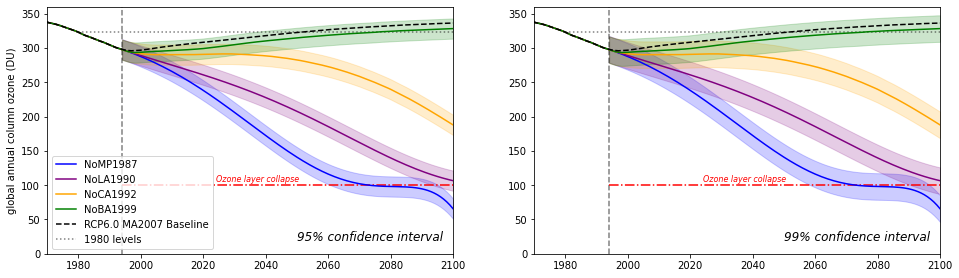

In [47]:
# make the same plot as above, but account for statistical uncertainity in the fit of EESC to ozone rather than the world avoided uncertainity (125% etc.) - 95% confidence interval

from matplotlib import pyplot as plt
#plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16, 10)


#final_eesc

# mid ones

final_eesc['EESC MA2007 baseline fit'] = (z2[0]*final_eesc['MA2007 baseline']**3) + (z2[1]*final_eesc['MA2007 baseline']**2) + (z2[2]*final_eesc['MA2007 baseline']) + (z2[3])
final_eesc['EESC NoMP1987 fit'] = (z2[0]*final_eesc['MP']**3) + (z2[1]*final_eesc['MP']**2) + (z2[2]*final_eesc['MP']) + (z2[3])
final_eesc['EESC NoLA1990 fit'] = (z2[0]*final_eesc['LA']**3) + (z2[1]*final_eesc['LA']**2) + (z2[2]*final_eesc['LA']) + (z2[3])
final_eesc['EESC NoCA1992 fit'] = (z2[0]*final_eesc['CA']**3) + (z2[1]*final_eesc['CA']**2) + (z2[2]*final_eesc['CA']) + (z2[3])
final_eesc['EESC NoBA1999 fit'] = (z2[0]*final_eesc['BA']**3) + (z2[1]*final_eesc['BA']**2) + (z2[2]*final_eesc['BA']) + (z2[3])

# lower ones - 95%

#final_eesc['EESC MA2007 baseline fit'] = (z2[0]*final_eesc['MA2007 baseline']**3) + (z2[1]*final_eesc['MA2007 baseline']**2) + (z2[2]*final_eesc['MA2007 baseline']) + (z2[3])
final_eesc['EESC NoMP1987 lower stat fit'] = (z2_lower[0]*final_eesc['MP']**3) + (z2_lower[1]*final_eesc['MP']**2) + (z2_lower[2]*final_eesc['MP']) + (z2_lower[3])
final_eesc['EESC NoLA1990 lower stat fit'] = (z2_lower[0]*final_eesc['LA']**3) + (z2_lower[1]*final_eesc['LA']**2) + (z2_lower[2]*final_eesc['LA']) + (z2_lower[3])
final_eesc['EESC NoCA1992 lower stat fit'] = (z2_lower[0]*final_eesc['CA']**3) + (z2_lower[1]*final_eesc['CA']**2) + (z2_lower[2]*final_eesc['CA']) + (z2_lower[3])
final_eesc['EESC NoBA1999 lower stat fit'] = (z2_lower[0]*final_eesc['BA']**3) + (z2_lower[1]*final_eesc['BA']**2) + (z2_lower[2]*final_eesc['BA']) + (z2_lower[3])

# upper ones - 95%

#final_eesc['EESC MA2007 baseline fit'] = (z2[0]*final_eesc['MA2007 baseline']**3) + (z2[1]*final_eesc['MA2007 baseline']**2) + (z2[2]*final_eesc['MA2007 baseline']) + (z2[3])
final_eesc['EESC NoMP1987 upper stat fit'] = (z2_upper[0]*final_eesc['MP']**3) + (z2_upper[1]*final_eesc['MP']**2) + (z2_upper[2]*final_eesc['MP']) + (z2_upper[3])
final_eesc['EESC NoLA1990 upper stat fit'] = (z2_upper[0]*final_eesc['LA']**3) + (z2_upper[1]*final_eesc['LA']**2) + (z2_upper[2]*final_eesc['LA']) + (z2_upper[3])
final_eesc['EESC NoCA1992 upper stat fit'] = (z2_upper[0]*final_eesc['CA']**3) + (z2_upper[1]*final_eesc['CA']**2) + (z2_upper[2]*final_eesc['CA']) + (z2_upper[3])
final_eesc['EESC NoBA1999 upper stat fit'] = (z2_upper[0]*final_eesc['BA']**3) + (z2_upper[1]*final_eesc['BA']**2) + (z2_upper[2]*final_eesc['BA']) + (z2_upper[3])

# lower ones - 99%

final_eesc['EESC NoMP1987 lower stat fit 99'] = (z2_lower_99[0]*final_eesc['MP']**3) + (z2_lower_99[1]*final_eesc['MP']**2) + (z2_lower_99[2]*final_eesc['MP']) + (z2_lower_99[3])
final_eesc['EESC NoLA1990 lower stat fit 99'] = (z2_lower_99[0]*final_eesc['LA']**3) + (z2_lower_99[1]*final_eesc['LA']**2) + (z2_lower_99[2]*final_eesc['LA']) + (z2_lower_99[3])
final_eesc['EESC NoCA1992 lower stat fit 99'] = (z2_lower_99[0]*final_eesc['CA']**3) + (z2_lower_99[1]*final_eesc['CA']**2) + (z2_lower_99[2]*final_eesc['CA']) + (z2_lower_99[3])
final_eesc['EESC NoBA1999 lower stat fit 99'] = (z2_lower_99[0]*final_eesc['BA']**3) + (z2_lower_99[1]*final_eesc['BA']**2) + (z2_lower_99[2]*final_eesc['BA']) + (z2_lower_99[3])

# upper ones - 99%

final_eesc['EESC NoMP1987 upper stat fit 99'] = (z2_upper_99[0]*final_eesc['MP']**3) + (z2_upper_99[1]*final_eesc['MP']**2) + (z2_upper_99[2]*final_eesc['MP']) + (z2_upper_99[3])
final_eesc['EESC NoLA1990 upper stat fit 99'] = (z2_upper_99[0]*final_eesc['LA']**3) + (z2_upper_99[1]*final_eesc['LA']**2) + (z2_upper_99[2]*final_eesc['LA']) + (z2_upper_99[3])
final_eesc['EESC NoCA1992 upper stat fit 99'] = (z2_upper_99[0]*final_eesc['CA']**3) + (z2_upper_99[1]*final_eesc['CA']**2) + (z2_upper_99[2]*final_eesc['CA']) + (z2_upper_99[3])
final_eesc['EESC NoBA1999 upper stat fit 99'] = (z2_upper_99[0]*final_eesc['BA']**3) + (z2_upper_99[1]*final_eesc['BA']**2) + (z2_upper_99[2]*final_eesc['BA']) + (z2_upper_99[3])


df = final_eesc

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

#plt.fill_between(df['year'],df['EESC RCP60 baseline lower fit'],df['EESC RCP60 baseline upper fit'],color='black', alpha=0.2)

ax1.plot(df['year'],df['EESC NoMP1987 fit'],label='NoMP1987',color='blue')
ax1.fill_between(df.loc[32:,'year'],df.loc[32:,'EESC NoMP1987 lower stat fit'],df.loc[32:,'EESC NoMP1987 upper stat fit'],color='blue', alpha=0.2)
ax1.plot(df['year'],df['EESC NoLA1990 fit'],label='NoLA1990',color='purple')
ax1.fill_between(df.loc[32:,'year'],df.loc[32:,'EESC NoLA1990 lower stat fit'],df.loc[32:,'EESC NoLA1990 upper stat fit'],color='purple', alpha=0.2)
ax1.plot(df['year'],df['EESC NoCA1992 fit'],label='NoCA1992',color='orange')
ax1.fill_between(df.loc[32:,'year'],df.loc[32:,'EESC NoCA1992 lower stat fit'],df.loc[32:,'EESC NoCA1992 upper stat fit'],color='orange', alpha=0.2)
ax1.plot(df['year'],df['EESC NoBA1999 fit'],label='NoBA1999',color='green')
ax1.fill_between(df.loc[32:,'year'],df.loc[32:,'EESC NoBA1999 lower stat fit'],df.loc[32:,'EESC NoBA1999 upper stat fit'],color='green', alpha=0.2)
ax1.plot(df['year'],df['EESC MA2007 baseline fit'],label='RCP6.0 MA2007 Baseline',color='black',linestyle='dashed')

#plt.plot(annual_global_ozone['year'],numeric_cubic_fit,label='NoMR1974 Fit',linestyle='dashdot',color='indigo',alpha = 0.9)
#plt.fill_between(df_sem['year'],df_sem['numeric cubic fit lower'],df_sem['numeric cubic fit upper'],color='black', alpha=0.2)

#plt.plot(annual_global_ozone['year'],annual_global_ozone['o3colglobe'],label='NoMR1974 TCO',linestyle='dashed',color='fuchsia',alpha = 0.5)

ax1.set_ylabel('global annual column ozone (DU)',fontsize=10)
ax1.tick_params(axis='both',which='major')
ax1.set_ylim([0,360])
ax1.set_xlim(1970,2100)
ax1.hlines(y=df.loc[18,'EESC MA2007 baseline fit'],xmin=1980,xmax=2100,colors='black',linestyle='dotted',alpha=0.5,label='1980 levels')
ax1.vlines(x=1994,linestyle='dashed',ymin=0,ymax=360,alpha = 0.5)
ax1.hlines(y=100,xmin=1994,xmax=2100,linestyle='dashdot',color='red')
ax1.text(2024,105,'Ozone layer collapse',color='red',fontsize=8,fontstyle='italic')
ax1.text(2050,20,'95% confidence interval',color='black',fontsize=12,fontstyle='italic')
#plt.grid(alpha=0.4)
ax1.legend(fontsize=10)
#ax1.figure(figsize=(14,18))

# now for the 99% ci plot

ax2.plot(df['year'],df['EESC NoMP1987 fit'],label='NoMP1987',color='blue')
ax2.fill_between(df.loc[32:,'year'],df.loc[32:,'EESC NoMP1987 lower stat fit 99'],df.loc[32:,'EESC NoMP1987 upper stat fit 99'],color='blue', alpha=0.2)
ax2.plot(df['year'],df['EESC NoLA1990 fit'],label='NoLA1990',color='purple')
ax2.fill_between(df.loc[32:,'year'],df.loc[32:,'EESC NoLA1990 lower stat fit 99'],df.loc[32:,'EESC NoLA1990 upper stat fit 99'],color='purple', alpha=0.2)
ax2.plot(df['year'],df['EESC NoCA1992 fit'],label='NoCA1992',color='orange')
ax2.fill_between(df.loc[32:,'year'],df.loc[32:,'EESC NoCA1992 lower stat fit 99'],df.loc[32:,'EESC NoCA1992 upper stat fit 99'],color='orange', alpha=0.2)
ax2.plot(df['year'],df['EESC NoBA1999 fit'],label='NoBA1999',color='green')
ax2.fill_between(df.loc[32:,'year'],df.loc[32:,'EESC NoBA1999 lower stat fit 99'],df.loc[32:,'EESC NoBA1999 upper stat fit 99'],color='green', alpha=0.2)
ax2.plot(df['year'],df['EESC MA2007 baseline fit'],label='RCP6.0 MA2007 Baseline',color='black',linestyle='dashed')

#plt.plot(annual_global_ozone['year'],numeric_cubic_fit,label='NoMR1974 Fit',linestyle='dashdot',color='indigo',alpha = 0.9)
#plt.fill_between(df_sem['year'],df_sem['numeric cubic fit lower'],df_sem['numeric cubic fit upper'],color='black', alpha=0.2)

#plt.plot(annual_global_ozone['year'],annual_global_ozone['o3colglobe'],label='NoMR1974 TCO',linestyle='dashed',color='fuchsia',alpha = 0.5)

#ax2.set_ylabel('global annual column ozone (DU)',fontsize=10)
ax2.tick_params(axis='both',which='major')
ax2.set_ylim([0,360])
ax2.set_xlim(1970,2100)
ax2.hlines(y=df.loc[18,'EESC MA2007 baseline fit'],xmin=1980,xmax=2100,colors='black',linestyle='dotted',alpha=0.5,label='1980 levels')
ax2.vlines(x=1994,linestyle='dashed',ymin=0,ymax=360,alpha = 0.5)
ax2.hlines(y=100,xmin=1994,xmax=2100,linestyle='dashdot',color='red')
ax2.text(2024,105,'Ozone layer collapse',color='red',fontsize=8,fontstyle='italic')
ax2.text(2050,20,'99% confidence interval',color='black',fontsize=12,fontstyle='italic')
#plt.grid(alpha=0.4)
#ax2.legend(fontsize=16)
#ax2.figure(figsize=(14,18))

In [48]:
# now lets get the +-25/50% scenarios together

df

,Unnamed: 0,year,MA2007 baseline,MP,LA,CA,BA,MP lower,LA lower,CA lower,...,EESC NoCA1992 upper stat fit,EESC NoBA1999 upper stat fit,EESC NoMP1987 lower stat fit 99,EESC NoLA1990 lower stat fit 99,EESC NoCA1992 lower stat fit 99,EESC NoBA1999 lower stat fit 99,EESC NoMP1987 upper stat fit 99,EESC NoLA1990 upper stat fit 99,EESC NoCA1992 upper stat fit 99,EESC NoBA1999 upper stat fit 99
0,0,1962.0,635.971223,635.971223,635.971223,635.971223,635.971223,476.978417,476.978417,476.978417,...,356.536647,356.536647,322.463564,322.463564,322.463564,322.463564,361.163856,361.163856,361.163856,361.163856
1,1,1963.0,635.971223,635.971223,635.971223,635.971223,635.971223,476.978417,476.978417,476.978417,...,356.536647,356.536647,322.463564,322.463564,322.463564,322.463564,361.163856,361.163856,361.163856,361.163856
2,2,1964.0,636.640935,636.640935,636.640935,636.640935,636.640935,477.480701,477.480701,477.480701,...,356.511242,356.511242,322.438159,322.438159,322.438159,322.438159,361.138451,361.138451,361.138451,361.138451
3,3,1965.0,652.086329,652.086329,652.086329,652.086329,652.086329,489.064746,489.064746,489.064746,...,355.925822,355.925822,321.852739,321.852739,321.852739,321.852739,360.553031,360.553031,360.553031,360.553031
4,4,1966.0,667.531722,667.531722,667.531722,667.531722,667.531722,500.648791,500.648791,500.648791,...,355.341344,355.341344,321.268261,321.268261,321.268261,321.268261,359.968553,359.968553,359.968553,359.968553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,2096.0,800.299279,26995.042943,12709.528140,5545.155990,1022.365468,20246.282207,9532.146105,4158.866992,...,213.879465,342.171780,63.689368,91.921585,179.806382,308.098697,102.389660,130.621877,218.506674,346.798989
135,135,2097.0,795.784170,27551.236935,12961.678728,5680.103108,1016.702158,20663.427701,9721.259046,4260.077331,...,211.070118,342.378116,60.271616,90.632738,176.997035,308.305033,98.971908,129.333030,215.697327,347.005324
136,136,2098.0,790.474819,28115.579716,13218.347906,5818.585678,1011.038849,21086.684787,9913.760929,4363.939258,...,208.242251,342.584576,56.289442,89.412158,174.169168,308.511493,94.989734,128.112450,212.869460,347.211785
137,137,2099.0,785.611511,28688.132740,13479.584286,5960.650081,1005.375540,21516.099555,10109.688214,4470.487561,...,205.398646,342.791160,51.681792,88.260910,171.325563,308.718077,90.382083,126.961202,210.025855,347.418369


In [49]:
#print(df.loc[:70,'EESC NoBA1999 fit upper 50'])

Text(2050, 20, '± 50% EESC')

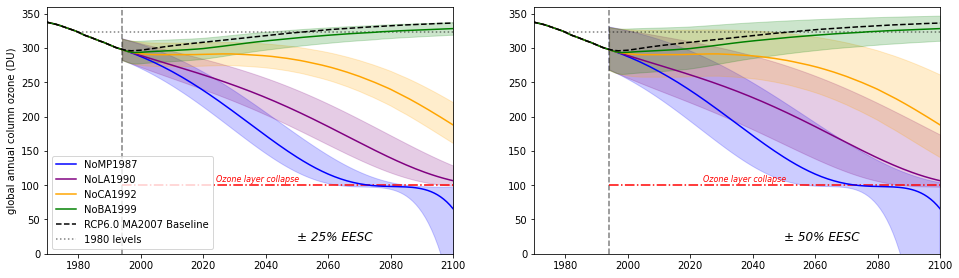

In [50]:
from matplotlib import pyplot as plt
#plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16, 10)


final_eesc = df

# mid ones

final_eesc['EESC MA2007 baseline fit'] = (z2[0]*final_eesc['MA2007 baseline']**3) + (z2[1]*final_eesc['MA2007 baseline']**2) + (z2[2]*final_eesc['MA2007 baseline']) + (z2[3])
final_eesc['EESC NoMP1987 fit'] = (z2[0]*final_eesc['MP']**3) + (z2[1]*final_eesc['MP']**2) + (z2[2]*final_eesc['MP']) + (z2[3])
final_eesc['EESC NoLA1990 fit'] = (z2[0]*final_eesc['LA']**3) + (z2[1]*final_eesc['LA']**2) + (z2[2]*final_eesc['LA']) + (z2[3])
final_eesc['EESC NoCA1992 fit'] = (z2[0]*final_eesc['CA']**3) + (z2[1]*final_eesc['CA']**2) + (z2[2]*final_eesc['CA']) + (z2[3])
final_eesc['EESC NoBA1999 fit'] = (z2[0]*final_eesc['BA']**3) + (z2[1]*final_eesc['BA']**2) + (z2[2]*final_eesc['BA']) + (z2[3])

# lower ones - 25

final_eesc['EESC NoMP1987 fit lower 25'] = (z2[0]*final_eesc['MP lower']**3) + (z2[1]*final_eesc['MP lower']**2) + (z2[2]*final_eesc['MP lower']) + (z2[3])
final_eesc['EESC NoLA1990 fit lower 25'] = (z2[0]*final_eesc['LA lower']**3) + (z2[1]*final_eesc['LA lower']**2) + (z2[2]*final_eesc['LA lower']) + (z2[3])
final_eesc['EESC NoCA1992 fit lower 25'] = (z2[0]*final_eesc['CA lower']**3) + (z2[1]*final_eesc['CA lower']**2) + (z2[2]*final_eesc['CA lower']) + (z2[3])
final_eesc['EESC NoBA1999 fit lower 25'] = (z2[0]*final_eesc['BA lower']**3) + (z2[1]*final_eesc['BA lower']**2) + (z2[2]*final_eesc['BA lower']) + (z2[3])

# upper ones - 25

final_eesc['EESC NoMP1987 fit upper 25'] = (z2[0]*final_eesc['MP upper']**3) + (z2[1]*final_eesc['MP upper']**2) + (z2[2]*final_eesc['MP upper']) + (z2[3])
final_eesc['EESC NoLA1990 fit upper 25'] = (z2[0]*final_eesc['LA upper']**3) + (z2[1]*final_eesc['LA upper']**2) + (z2[2]*final_eesc['LA upper']) + (z2[3])
final_eesc['EESC NoCA1992 fit upper 25'] = (z2[0]*final_eesc['CA upper']**3) + (z2[1]*final_eesc['CA upper']**2) + (z2[2]*final_eesc['CA upper']) + (z2[3])
final_eesc['EESC NoBA1999 fit upper 25'] = (z2[0]*final_eesc['BA upper']**3) + (z2[1]*final_eesc['BA upper']**2) + (z2[2]*final_eesc['BA upper']) + (z2[3])

# lower ones - 50

final_eesc['EESC NoMP1987 fit lower 50'] = (z2[0]*final_eesc['MP lower 50']**3) + (z2[1]*final_eesc['MP lower 50']**2) + (z2[2]*final_eesc['MP lower 50']) + (z2[3])
final_eesc['EESC NoLA1990 fit lower 50'] = (z2[0]*final_eesc['LA lower 50']**3) + (z2[1]*final_eesc['LA lower 50']**2) + (z2[2]*final_eesc['LA lower 50']) + (z2[3])
final_eesc['EESC NoCA1992 fit lower 50'] = (z2[0]*final_eesc['CA lower 50']**3) + (z2[1]*final_eesc['CA lower 50']**2) + (z2[2]*final_eesc['CA lower 50']) + (z2[3])
final_eesc['EESC NoBA1999 fit lower 50'] = (z2[0]*final_eesc['BA lower 50']**3) + (z2[1]*final_eesc['BA lower 50']**2) + (z2[2]*final_eesc['BA lower 50']) + (z2[3])

# upper ones - 50

final_eesc['EESC NoMP1987 fit upper 50'] = (z2[0]*final_eesc['MP upper 50']**3) + (z2[1]*final_eesc['MP upper 50']**2) + (z2[2]*final_eesc['MP upper 50']) + (z2[3])
final_eesc['EESC NoLA1990 fit upper 50'] = (z2[0]*final_eesc['LA upper 50']**3) + (z2[1]*final_eesc['LA upper 50']**2) + (z2[2]*final_eesc['LA upper 50']) + (z2[3])
final_eesc['EESC NoCA1992 fit upper 50'] = (z2[0]*final_eesc['CA upper 50']**3) + (z2[1]*final_eesc['CA upper 50']**2) + (z2[2]*final_eesc['CA upper 50']) + (z2[3])
final_eesc['EESC NoBA1999 fit upper 50'] = (z2[0]*final_eesc['BA upper 50']**3) + (z2[1]*final_eesc['BA upper 50']**2) + (z2[2]*final_eesc['BA upper 50']) + (z2[3])

df = final_eesc

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

#plt.fill_between(df['year'],df['EESC RCP60 baseline lower fit'],df['EESC RCP60 baseline upper fit'],color='black', alpha=0.2)

ax1.plot(df['year'],df['EESC NoMP1987 fit'],label='NoMP1987',color='blue')
ax1.fill_between(df.loc[32:,'year'],df.loc[32:,'EESC NoMP1987 fit lower 25'],df.loc[32:,'EESC NoMP1987 fit upper 25'],color='blue', alpha=0.2)
ax1.plot(df['year'],df['EESC NoLA1990 fit'],label='NoLA1990',color='purple')
ax1.fill_between(df.loc[32:,'year'],df.loc[32:,'EESC NoLA1990 fit lower 25'],df.loc[32:,'EESC NoLA1990 fit upper 25'],color='purple', alpha=0.2)
ax1.plot(df['year'],df['EESC NoCA1992 fit'],label='NoCA1992',color='orange')
ax1.fill_between(df.loc[32:,'year'],df.loc[32:,'EESC NoCA1992 fit lower 25'],df.loc[32:,'EESC NoCA1992 fit upper 25'],color='orange', alpha=0.2)
ax1.plot(df['year'],df['EESC NoBA1999 fit'],label='NoBA1999',color='green')
ax1.fill_between(df.loc[32:,'year'],df.loc[32:,'EESC NoBA1999 fit lower 25'],df.loc[32:,'EESC NoBA1999 fit upper 25'],color='green', alpha=0.2)
ax1.plot(df['year'],df['EESC MA2007 baseline fit'],label='RCP6.0 MA2007 Baseline',color='black',linestyle='dashed')

#plt.plot(annual_global_ozone['year'],numeric_cubic_fit,label='NoMR1974 Fit',linestyle='dashdot',color='indigo',alpha = 0.9)
#plt.fill_between(df_sem['year'],df_sem['numeric cubic fit lower'],df_sem['numeric cubic fit upper'],color='black', alpha=0.2)

#plt.plot(annual_global_ozone['year'],annual_global_ozone['o3colglobe'],label='NoMR1974 TCO',linestyle='dashed',color='fuchsia',alpha = 0.5)

ax1.set_ylabel('global annual column ozone (DU)',fontsize=10)
ax1.tick_params(axis='both',which='major')
ax1.set_ylim([0,360])
ax1.set_xlim(1970,2100)
ax1.hlines(y=df.loc[18,'EESC MA2007 baseline fit'],xmin=1980,xmax=2100,colors='black',linestyle='dotted',alpha=0.5,label='1980 levels')
ax1.vlines(x=1994,linestyle='dashed',ymin=0,ymax=360,alpha = 0.5)
ax1.hlines(y=100,xmin=1994,xmax=2100,linestyle='dashdot',color='red')
ax1.text(2024,105,'Ozone layer collapse',color='red',fontsize=8,fontstyle='italic')
ax1.text(2050,20,u"\u00B1 25% EESC",color='black',fontsize=12,fontstyle='italic')
#plt.grid(alpha=0.4)
ax1.legend(fontsize=10)
#ax1.figure(figsize=(14,18))

# now for the 99% ci plot

ax2.plot(df['year'],df['EESC NoMP1987 fit'],label='NoMP1987',color='blue')
ax2.fill_between(df.loc[32:,'year'],df.loc[32:,'EESC NoMP1987 fit lower 50'],df.loc[32:,'EESC NoMP1987 fit upper 50'],color='blue', alpha=0.2)
ax2.plot(df['year'],df['EESC NoLA1990 fit'],label='NoLA1990',color='purple')
ax2.fill_between(df.loc[32:,'year'],df.loc[32:,'EESC NoLA1990 fit lower 50'],df.loc[32:,'EESC NoLA1990 fit upper 50'],color='purple', alpha=0.2)
ax2.plot(df['year'],df['EESC NoCA1992 fit'],label='NoCA1992',color='orange')
ax2.fill_between(df.loc[32:,'year'],df.loc[32:,'EESC NoCA1992 fit lower 50'],df.loc[32:,'EESC NoCA1992 fit upper 50'],color='orange', alpha=0.2)
ax2.plot(df['year'],df['EESC NoBA1999 fit'],label='NoBA1999',color='green')
ax2.fill_between(df.loc[32:,'year'],df.loc[32:,'EESC NoBA1999 fit lower 50'],df.loc[32:,'EESC NoBA1999 fit upper 50'],color='green', alpha=0.2)
ax2.plot(df['year'],df['EESC MA2007 baseline fit'],label='RCP6.0 MA2007 Baseline',color='black',linestyle='dashed')

#plt.plot(annual_global_ozone['year'],numeric_cubic_fit,label='NoMR1974 Fit',linestyle='dashdot',color='indigo',alpha = 0.9)
#plt.fill_between(df_sem['year'],df_sem['numeric cubic fit lower'],df_sem['numeric cubic fit upper'],color='black', alpha=0.2)

#plt.plot(annual_global_ozone['year'],annual_global_ozone['o3colglobe'],label='NoMR1974 TCO',linestyle='dashed',color='fuchsia',alpha = 0.5)

#ax2.set_ylabel('global annual column ozone (DU)',fontsize=10)
ax2.tick_params(axis='both',which='major')
ax2.set_ylim([0,360])
ax2.set_xlim(1970,2100)
ax2.hlines(y=df.loc[18,'EESC MA2007 baseline fit'],xmin=1980,xmax=2100,colors='black',linestyle='dotted',alpha=0.5,label='1980 levels')
ax2.vlines(x=1994,linestyle='dashed',ymin=0,ymax=360,alpha = 0.5)
ax2.hlines(y=100,xmin=1994,xmax=2100,linestyle='dashdot',color='red')
ax2.text(2024,105,'Ozone layer collapse',color='red',fontsize=8,fontstyle='italic')
ax2.text(2050,20,u"\u00B1 50% EESC",color='black',fontsize=12,fontstyle='italic')
#plt.grid(alpha=0.4)
#ax2.legend(fontsize=16)
#ax2.figure(figsize=(14,18))

In [51]:
#print(df.loc[78, 'year'])

#print(((df.loc[138, 'EESC NoBA1999 upper stat fit']) - (df.loc[138, 'EESC NoBA1999 lower stat fit']))/2)
#print(((df.loc[138, 'EESC NoBA1999 upper stat fit 99']) - (df.loc[138, 'EESC NoBA1999 lower stat fit 99']))/2)
#print(((df.loc[138, 'EESC NoBA1999 fit upper 25']) - (df.loc[138, 'EESC NoBA1999 fit lower 25']))/2)
#print(((df.loc[138, 'EESC NoBA1999 fit upper 50']) - (df.loc[138, 'EESC NoBA1999 fit lower 50']))/2)

print(df.loc[18,'EESC MA2007 baseline fit'])

322.82170807977707


In [52]:
fit_output = df[["EESC NoMP1987 fit", "EESC NoLA1990 fit","EESC NoCA1992 fit","EESC NoBA1999 fit","EESC MA2007 baseline fit"]]

fit_output

,EESC NoMP1987 fit,EESC NoLA1990 fit,EESC NoCA1992 fit,EESC NoBA1999 fit,EESC MA2007 baseline fit
0,341.813711,341.813711,341.813711,341.813711,341.813711
1,341.813711,341.813711,341.813711,341.813711,341.813711
2,341.788305,341.788305,341.788305,341.788305,341.788305
3,341.202885,341.202885,341.202885,341.202885,341.202885
4,340.618408,340.618408,340.618408,340.618408,340.618408
...,...,...,...,...,...
134,83.039512,111.271731,199.156528,327.448843,335.633054
135,79.621760,109.982884,196.347181,327.655179,335.801456
136,75.639586,108.762304,193.519314,327.861639,335.999583
137,71.031935,107.611056,190.675709,328.068224,336.181163
